In [22]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


C:\Users\lyw\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
#参数
gamma=0.5#折现率
rewardSize=-1 
gridSize=4 #网格大小
alpha = 0.5 # (0,1] // stepSize 步长
terminationStates=[[0,0],[gridSize-1,gridSize-1]]   #[0,0]  [3,3]结束位置
actions=[[-1,0],[1,0],[0,1],[0,-1]]      #对应 上  下  右   左
numIterations=10000 #迭代次数

In [24]:
# 初始化
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)} #字典
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)} #字典
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

![jupyter](./third.jpg)

#### 与方法一比较：
#### 同：使用下一状态的期望值来丰富预测
#### 异：不是用所有可能性的下一状态来预测，下一状态是唯一的


#### 与方法二mc比较：
#### 同：都是随机产生随机位置
#### 异：方法二是先要产生完整路径，然后学习。该方法只要产生一个位置就开始学习


In [25]:
# utils
def generateInitialState():
    initState = random.choice(states[1:-1])         #随机位置
    return initState
def generateNextAction():                           #随机动作
    return random.choice(actions)
def takeAction(state, action):                      #返回反馈和下个位置
    if list(state) in terminationStates:
        return 0, None
    finalState = np.array(state)+np.array(action)
    # if robot crosses wall
    if -1 in list(finalState) or gridSize in list(finalState):
        finalState = state
    return rewardSize, list(finalState)

In [26]:
for it in tqdm(range(numIterations)):
    state = generateInitialState()
    while True:
        action = generateNextAction()
        reward, finalState = takeAction(state, action)
        # 我们到了终点
        if finalState is None:
            break
        # 修改 Value 函数
        before =  V[state[0], state[1]]
        V[state[0], state[1]] += alpha*(reward + gamma*V[finalState[0], finalState[1]] - V[state[0], state[1]])    #更新值函数
        deltas[state[0], state[1]].append(float(np.abs(before-V[state[0], state[1]])))                             #值函数变化情况
        state = finalState

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5160.35it/s]


In [27]:
V

array([[ 0.        , -1.57315607, -1.87160376, -1.9988016 ],
       [-1.62075109, -1.91806281, -1.96836998, -1.99596077],
       [-1.99257295, -1.95156882, -1.7812363 , -1.94107   ],
       [-1.98763991, -1.92604104, -1.25382187,  0.        ]])

##### gamma取0.5 alpha取0.5 不收敛，可以自己调节这两个参数

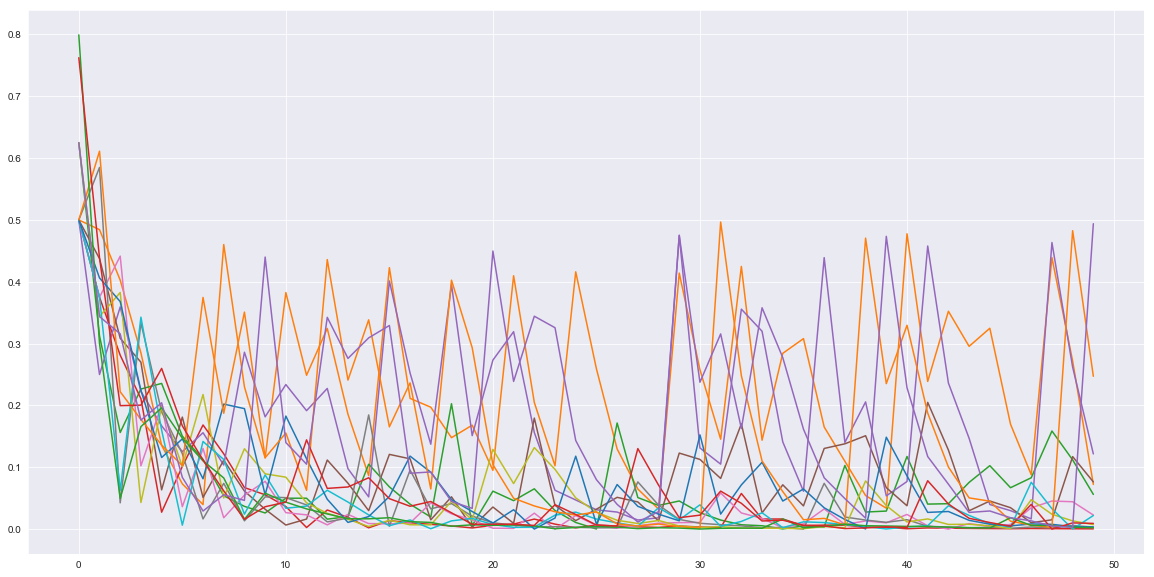

In [28]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)